# add alllick to mat

In [5]:
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import pearsonr
from scipy.io import savemat
from utils import daily_blocks, extract_all_licks, get_tone_response_df, block_stim_evoke_response
plt.rcParams['axes.facecolor'] = 'white'
outcome_list = ['Hit', 'Miss', 'FA', 'CR']
mouse_names = ['jl009', 'fz017', 'fz009', 'fz006']
data_paths = ["Z:/Jenni/jl009/behavimaging.mat",
             "W:/Jenni/fz017/behavimaging.mat",
             "Y:/Jenni/fz009/behavimaging.mat",
             "Y:/sarah/fz006/behavimaging.mat"]
disks = ['Z:/Jenni', 'W:/Jenni', 'Y:/Jenni', 'Y:/Jenni']

In [6]:
mouse_id = 0
mouse_name = mouse_names[mouse_id]
disk = disks[mouse_id]

In [3]:
print('running')
raw_data_path = data_paths[mouse_id]
mat = scipy.io.loadmat(raw_data_path)
savemat('data/raw/{}_behavimaging_raw.mat'.format(mouse_name), mat)
data = mat['behavimaging']
nBlocks = data.shape[-1]

running


In [7]:
nDays = data[0, -1]['day'][0][0]

for day in range(1, nDays+1):
    iblocks = daily_blocks(data, day)
    if len(iblocks)>0:
        for i in iblocks:
            print('day {}, block {}'.format(day, i+1))
            block = data[0, i]
            behavior, firstlickframes, raw_alllickframes = extract_all_licks(block, disk)
            block['behavdata'] = behavior
            data[0, i] = block
            
mat['behavimaging'] = data
savemat('{}_behavimaging.mat'.format(mouse_name), mat)

day 1, block 1
processing jl009_1v1 ...
number of frames in total: 27082.0
number of frames in total(2 plane): 13541
number of frames in structure: 13540
total number of licks:  2430
number of tones:  83
mismatch frames:
2237 [2234. 2240.]
11897 [11852. 11899.]
jl009_1v1 finished!

day 1, block 2
processing jl009_1v2 ...
number of frames in total: 22947.0
number of frames in total(2 plane): 11473
number of frames in structure: 11474
total number of licks:  774
number of tones:  41
mismatch frames:
jl009_1v2 finished!

day 1, block 3
processing jl009_1v3 ...
number of frames in total: 19878.0
number of frames in total(2 plane): 9939
number of frames in structure: 9940
total number of licks:  175
number of tones:  17
mismatch frames:
jl009_1v3 finished!

day 2, block 4
processing jl009_2v1 ...
number of frames in total: 25390.0
number of frames in total(2 plane): 12695
number of frames in structure: 12694
total number of licks:  1145
number of tones:  81
mismatch frames:
jl009_2v1 finish

In [8]:
data_path = "{}_behavimaging.mat".format(mouse_name)
test_mat = scipy.io.loadmat(data_path)
test_data = test_mat['behavimaging']
nBlocks = test_data.shape[-1]
block = test_data[0, 0]
behavior = block['behavdata']

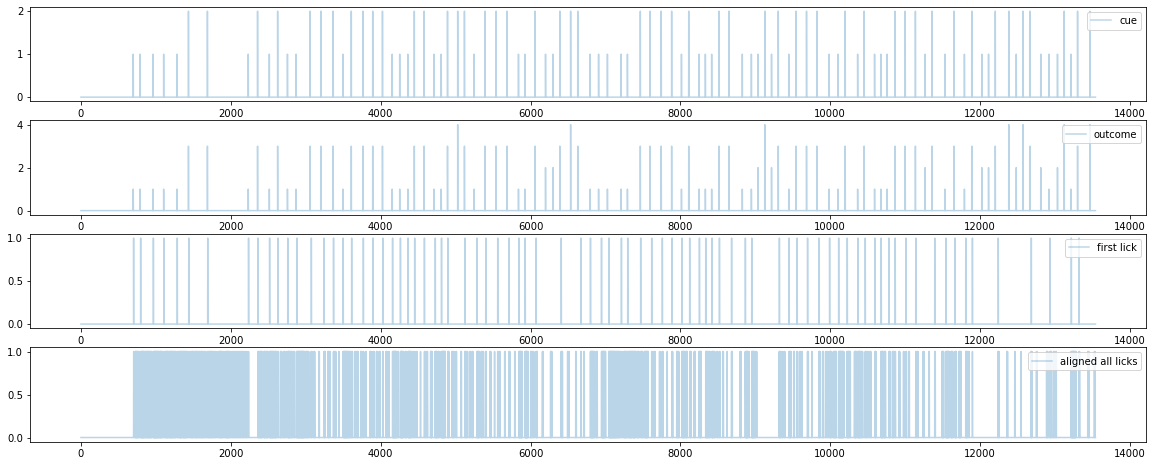

In [9]:
x = np.arange(behavior.shape[1])
# x = np.arange(6000, 8000)
plt.figure(figsize=(20, 8))
plt.subplot(411)
plt.plot(x, behavior[0][x], alpha=0.3, label='cue')
plt.legend(loc=1)
plt.subplot(412)
plt.plot(x, behavior[1][x], alpha=0.3, label='outcome')
# plt.plot(x, alllicks[x], alpha=0.4, label='raw all licks')
plt.legend(loc=1)
plt.subplot(413)
plt.plot(x, behavior[2][x], alpha=0.3, label='first lick')
plt.legend(loc=1)
plt.subplot(414)
plt.plot(x, behavior[3][x], alpha=0.3, label='aligned all licks')
plt.legend(loc=1)
# plt.legend()
plt.show()

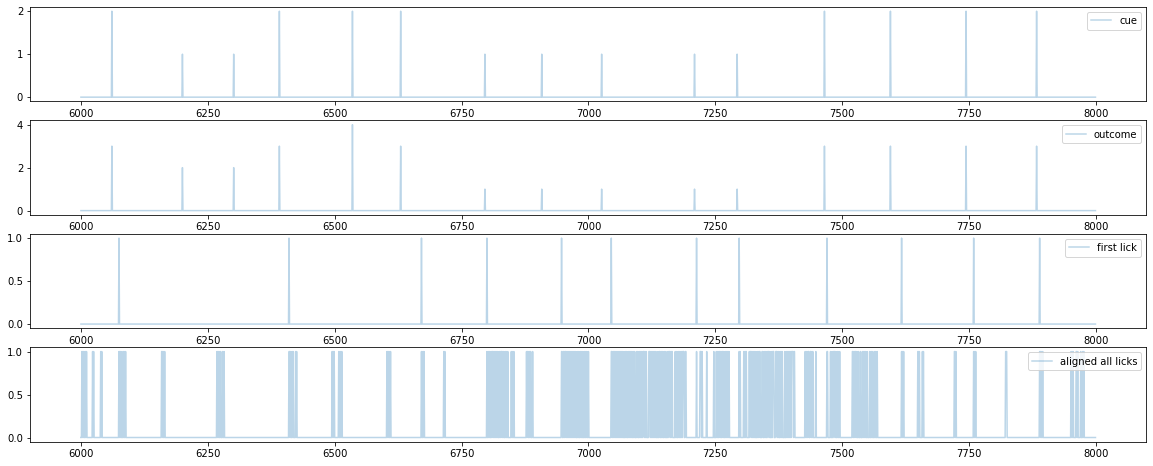

In [10]:
x = np.arange(behavior.shape[1])
x = np.arange(6000, 8000)
plt.figure(figsize=(20, 8))
plt.subplot(411)
plt.plot(x, behavior[0][x], alpha=0.3, label='cue')
plt.legend(loc=1)
plt.subplot(412)
plt.plot(x, behavior[1][x], alpha=0.3, label='outcome')
# plt.plot(x, alllicks[x], alpha=0.4, label='raw all licks')
plt.legend(loc=1)
plt.subplot(413)
plt.plot(x, behavior[2][x], alpha=0.3, label='first lick')
plt.legend(loc=1)
plt.subplot(414)
plt.plot(x, behavior[3][x], alpha=0.3, label='aligned all licks')
plt.legend(loc=1)
# plt.legend()
plt.show()